In [15]:
!pip install gdal numpy matplotlib
!pip install numpy
!pip install matplotlib 

In [16]:
# bibliotecas 
import gdal
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Lendo imagem e separando bandas RED e NIR 
img = gdal.Open('/content/drive/MyDrive/CBERS 4A/CBERS4A_FLONABSB.tif')
b_red = img.GetRasterBand(1).ReadAsArray()
b_nir = img.GetRasterBand(4).ReadAsArray()


In [50]:
img


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7efd195d30f0> >

In [46]:
# Calculando NDVI
ndvi = (b_nir - b_red)/(b_nir + b_red)

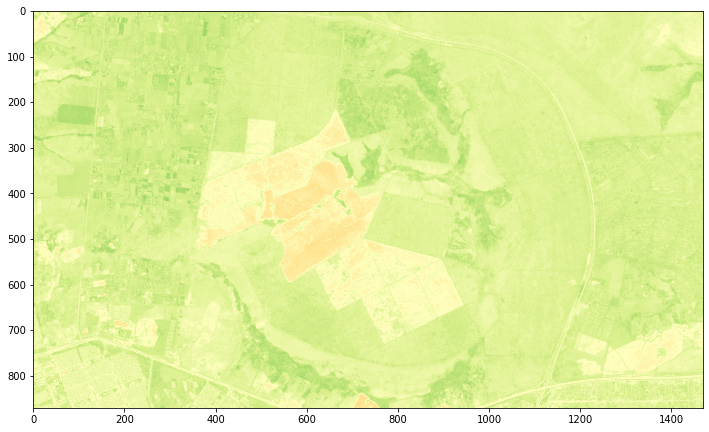

In [47]:
# Visualizando resultado
plt.figure(figsize=(12,8))
plt.imshow(ndvi, cmap='RdYlGn')

In [52]:
# Gravando imagem em disco 
driver = gdal.GetDriverByName("GTiff")

out = driver.Create("ndvi2.tif", ndvi.shape[1],
                    ndvi.shape[0], 1, gdal.GDT_CInt16)

out.SetGeoTransform(img.GetGeoTransform())
out.SetProjection(img.GetProjection())
out.GetRasterBand(1).WriteArray(ndvi)
out.FlushCache()
out = None
